# **PAPER PRESENTATION**

# Bài toán đặt ra  

Để hiểu trải nghiệm của Hành khách, Chất lượng dịch vụ và mức độ hài lòng của họ đối với các dịch vụ chuyến bay do họ cung cấp , ta tiến hành Sự dụng thuật toán  K-nearest neighbor và Navie-Bayes để dự đoán độ hài lòng của khách hàng dựa theo bộ dữ liệu tàu bay

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

# **Thông Tin Thuộc Tính:**

1.	Gender (Giới tính): Giới tính của hành khách (Nữ, Nam)
2.	Customer Type (Loại khách hang): Loại khách hàng (Khách hàng trung thành, khách hàng không trung thành)
3.	Age (Tuổi): Tuổi thực của hành khách 
4.	Type of Travel (Loại hình du lịch): Mục đích chuyến bay của hành khách (Đi cá nhân, Đi công tác) 
5.	Class (Hạng): Hạng du lịch trên máy bay của hành khách (hạng Thương gia, hạng Eco, hạng Eco Plus) 
6.	Flight distance (Khoảng cách bay): Khoảng cách bay của hành trình này
7.	Inflight wifi service (Dịch vụ wifi trên chuyến bay): Mức độ hài lòng đối với dịch vụ wifi trên chuyến bay (0: Không áp dụng; 1-5)
8.	Departure/Arrival time convenient (Độ thuận tiện của thời gian đi / đến): Mức độ hài lòng về độ thuận tiện của thời gian đi / đến 
9.	Ease of Online booking (Dễ dàng đặt vé trực tuyến): Mức độ hài lòng khi đặt vé trực tuyến
10.	Gate location (Vị trí cổng bay): Mức độ hài lòng về vị trí cổng bay
11.	Food and drink (Đồ ăn và thức uống): Mức độ hài lòng của Đồ ăn và thức uống
12.	Online boarding (Nội trú trực tuyến): Mức độ hài lòng của nội trú trực tuyến
13.	Seat comfort (Sự thoải mái của chỗ ngồi): Mức độ hài lòng về sự thoải mái của chỗ ngồi
14.	Inflight entertainment (Giải trí trên chuyến bay): Mức độ hài lòng của giải trí trên chuyến bay
15.	On-board service (Dịch vụ nhận vé mua trực tuyến): Mức độ hài lòng của dịch vụ nhận vé mua trực tuyến
16.	Leg room service (Dịch vụ phòng chờ): Mức độ hài lòng của dịch vụ phòng chờ
17.	Baggage handling (Xử lý hành lý): Mức độ hài lòng của việc xếp dỡ hành lý
18.	Check-in service (Dịch vụ nhận vé): Mức độ hài lòng về dịch vụ nhận vé
19.	Inflight service (Dịch vụ trên chuyến bay): Mức độ hài lòng của dịch vụ trên chuyến bay
20.	Cleanliness (Sạch sẽ): Mức độ hài lòng về Sạch sẽ
21.	Departure Delay in Minutes (Thời gian khởi hành chậm trễ tính theo phút): Khoảng thời gian máy bay bị trì hoãn khi khởi hành
22.	Arrival Delay in Minutes (Thời gian đến nơi muộn tính theo phút): Khoảng thời gian bay đên nơi châm trễ tính theo phút
23.	Satisfaction (Mức độ hài long): Mức độ hài lòng của hãng hàng không (Hài lòng, trung tính hoặc không hài lòng)


In [3]:
# Reading the dataset 
df_satisfaction = pd.read_csv('airline-passenger-satisfaction/train.csv',index_col='Unnamed: 0')

# First 5 obersvation
df_satisfaction.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [4]:
# First 5 observation
df_satisfaction.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [5]:
# Last 5 observation
df_satisfaction.tail()

id  Gender      Customer Type  Age   Type of Travel     Class  \
103899  94171  Female  disloyal Customer   23  Business travel       Eco   
103900  73097    Male     Loyal Customer   49  Business travel  Business   
103901  68825    Male  disloyal Customer   30  Business travel  Business   
103902  54173  Female  disloyal Customer   22  Business travel       Eco   
103903  62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Inflight entertainment  On-board service  Leg room service  \
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                5                 4            1   
103903                 4                4                 3            1   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
103899                           3                       0.0   
103900                           0                       0.0   
103901                           7                      14.0   
103902                           0                       0.0   
103903                           0                       0.0   

                   satisfaction  
103899  neutral or dissatisfied  
103900                satisfied  
103901  neutral or dissatisfied  
103902  neutral or dissatisfied  
103903  neutral or dissatisfied  

[5 rows x 24 columns]

In [6]:
# Checking for duplicates in the dataset
df_satisfaction[df_satisfaction.duplicated()]

Empty DataFrame
Columns: [id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 24 columns]

- **No Duplicates in the dataset.**

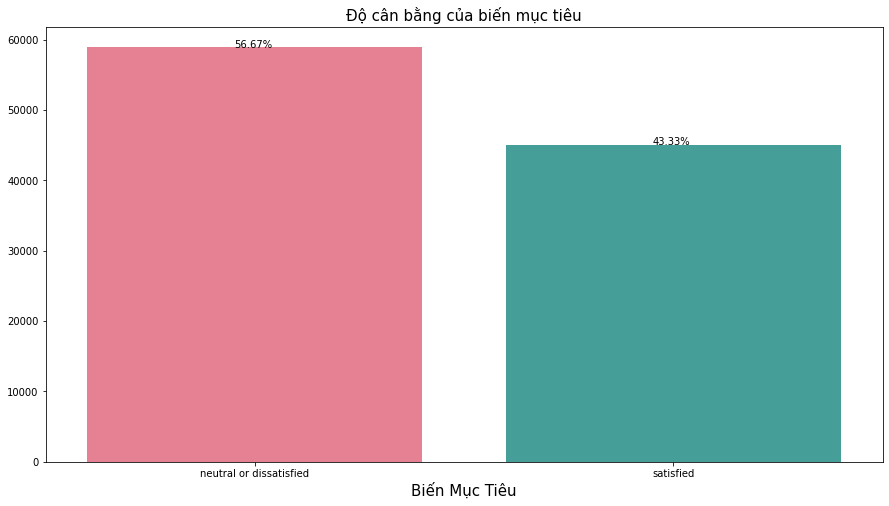

In [7]:
# Biến Mục Tiêu
df_target = df_satisfaction['satisfaction']
df_target.value_counts()
sns.countplot(x = df_target,palette='husl')
plt.text(x = 0.95, y = df_target.value_counts()[1] + 1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = -0.05, y = df_target.value_counts()[0] +1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.title('Độ cân bằng của biến mục tiêu', fontsize = 15)
plt.xlabel('Biến Mục Tiêu', fontsize = 15)
plt.ylabel('', fontsize = 15)
plt.show()


- **Biểu đồ trên cho thấy tỷ lệ phân bổ lần lượt là khoảng 56%: 44% giữa hành khách trung tính / không hài lòng và hành khách hài lòng.  Vì vậy, dữ liệu khá cân bằng và nó không yêu cầu bất kỳ xử lý đặc biệt nào.**


# **EDA**

EDA (Exploratory Data Analysis – Phân tích Khám phá Dữ liệu) là một bước quan trọng trước khi làm bất kỳ một bài toán ML với dữ liệu dạng bảng nào.

Trước khi xây dựng mô hình, bạn cần xây dựng đặc trưng. Trước khi xây dựng đặc trưng, bạn phải làm bước khám phá dữ liệu.

In [8]:
#Đếm số bản ghi dữ liệu và số các thuộc tính
print('Tổng số bản ghi:',df_satisfaction.shape[0])

print('Tổng Số Thuộc Tính:',df_satisfaction.shape[1])


Tổng số bản ghi: 103904
Tổng Số Thuộc Tính: 24


In [9]:
# Checking are datatype of the attribute
df_satisfaction.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

- **All the Datatype are corrected identified.**
Tất cả các Datatype đều được xác định.

In [10]:
# Describe Function 
df_satisfaction.describe()

id            Age  Flight Distance  Inflight wifi service  \
count  103904.000000  103904.000000    103904.000000          103904.000000   
mean    64924.210502      39.379706      1189.448375               2.729683   
std     37463.812252      15.114964       997.147281               1.327829   
min         1.000000       7.000000        31.000000               0.000000   
25%     32533.750000      27.000000       414.000000               2.000000   
50%     64856.500000      40.000000       843.000000               3.000000   
75%     97368.250000      51.000000      1743.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

- Five Point Summary are given here.

## **Missing Value Handling**

In [11]:
# Finding Missing Value in the Dataset
df_total = df_satisfaction.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df_satisfaction.isnull().sum()/df_satisfaction.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

Total  Percentage
Arrival Delay in Minutes             310    0.298352
id                                     0    0.000000
Gender                                 0    0.000000
Departure Delay in Minutes             0    0.000000
Cleanliness                            0    0.000000
Inflight service                       0    0.000000
Checkin service                        0    0.000000
Baggage handling                       0    0.000000
Leg room service                       0    0.000000
On-board service                       0    0.000000
Inflight entertainment                 0    0.000000
Seat comfort                           0    0.000000
Online boarding                        0    0.000000
Food and drink                         0    0.000000
Gate location                          0    0.000000
Ease of Online booking                 0    0.000000
Departure/Arrival time convenient      0    0.000000
Inflight wifi service                  0    0.000000
Flight Distance                        0    0.000000
Class                                  0    0.000000
Type of Travel                         0    0.000000
Age                                    0    0.000000
Customer Type                          0    0.000000
satisfaction                           0    0.000000

-  **Arival Delay in Minutes has missing of 0.3% and all the other variable doesnt have missing value.**

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

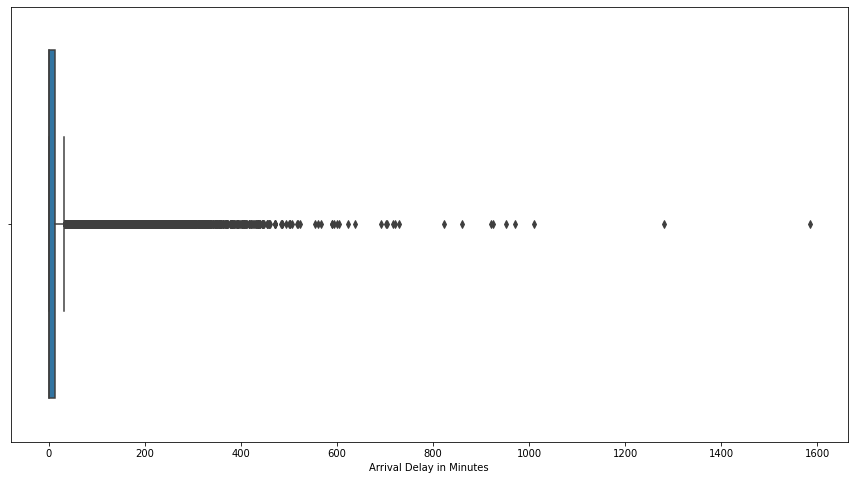

In [12]:
sns.boxplot(df_satisfaction['Arrival Delay in Minutes'])

In [13]:
#Checking for the median
df_satisfaction['Arrival Delay in Minutes'].median()

0.0

In [14]:
# Replace the missing the value with median as there are outliers
df_satisfaction['Arrival Delay in Minutes'].replace(np.NaN,0,inplace=True)

In [15]:
df_total = df_satisfaction.isnull().sum().sort_values(ascending=False)

# Percentage of missing value in the dataset
percentage = (((df_satisfaction.isnull().sum()/df_satisfaction.shape[0]))*100).sort_values(ascending=False)

# Table
table = pd.concat([df_total,percentage],keys=['Total','Percentage'],axis=1)
table

Total  Percentage
id                                     0         0.0
Gender                                 0         0.0
Arrival Delay in Minutes               0         0.0
Departure Delay in Minutes             0         0.0
Cleanliness                            0         0.0
Inflight service                       0         0.0
Checkin service                        0         0.0
Baggage handling                       0         0.0
Leg room service                       0         0.0
On-board service                       0         0.0
Inflight entertainment                 0         0.0
Seat comfort                           0         0.0
Online boarding                        0         0.0
Food and drink                         0         0.0
Gate location                          0         0.0
Ease of Online booking                 0         0.0
Departure/Arrival time convenient      0         0.0
Inflight wifi service                  0         0.0
Flight Distance                        0         0.0
Class                                  0         0.0
Type of Travel                         0         0.0
Age                                    0         0.0
Customer Type                          0         0.0
satisfaction                           0         0.0

- **No Missing Value in the dataset**

In [16]:
#Making a copy of the Dataset
df_sat =df_satisfaction.copy()

## **Removing Insigificant Variable  Loại bỏ biến không đặc hiệu **

In [17]:
# Removing the id column as it irrelvant
df_sat.drop(['id'],axis=1,inplace=True)

In [18]:
# Standard Deivation 
df_sat.std()

Age                                   15.114964
Flight Distance                      997.147281
Inflight wifi service                  1.327829
Departure/Arrival time convenient      1.525075
Ease of Online booking                 1.398929
Gate location                          1.277621
Food and drink                         1.329533
Online boarding                        1.349509
Seat comfort                           1.319088
Inflight entertainment                 1.332991
On-board service                       1.288354
Leg room service                       1.315605
Baggage handling                       1.180903
Checkin service                        1.265396
Inflight service                       1.175663
Cleanliness                            1.312273
Departure Delay in Minutes            38.230901
Arrival Delay in Minutes              38.649776
dtype: float64

- **None of the Attribute has Standard Deviation 0 we cant remove them.**

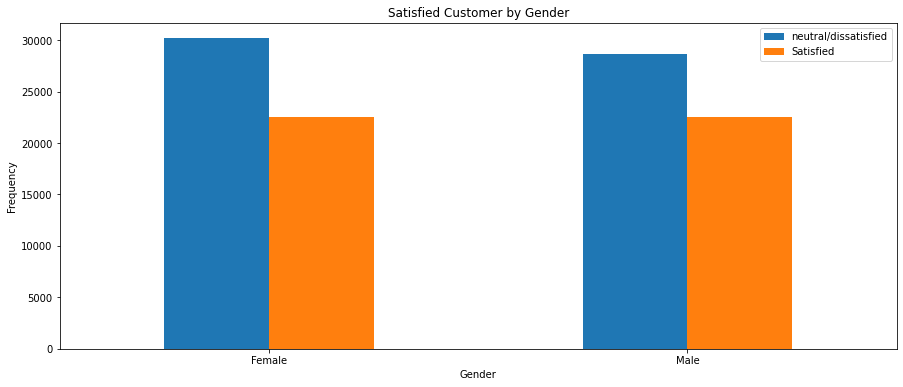

In [19]:
pd.crosstab(df_sat.Gender,df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Gender')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

- **Gender-wise distribution of dissatisfied and satisfied customers are quite same.In both the case male and female the dissatisfied customers are more than satisfied customer.**

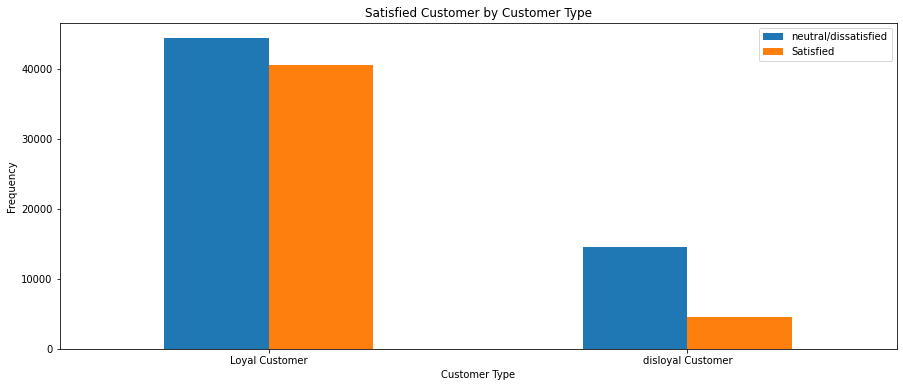

In [20]:
pd.crosstab(df_sat['Customer Type'],df_sat.satisfaction).plot(kind="bar",figsize=(15,6))
plt.title('Satisfied Customer by Customer Type')
plt.xticks(rotation=0)
plt.legend(['neutral/dissatisfied', 'Satisfied'])
plt.ylabel('Frequency')
plt.show()

- **Loyal Customer are more in number even tho count of satisfied and dissatisfied customer is same in Loyal Customer.**

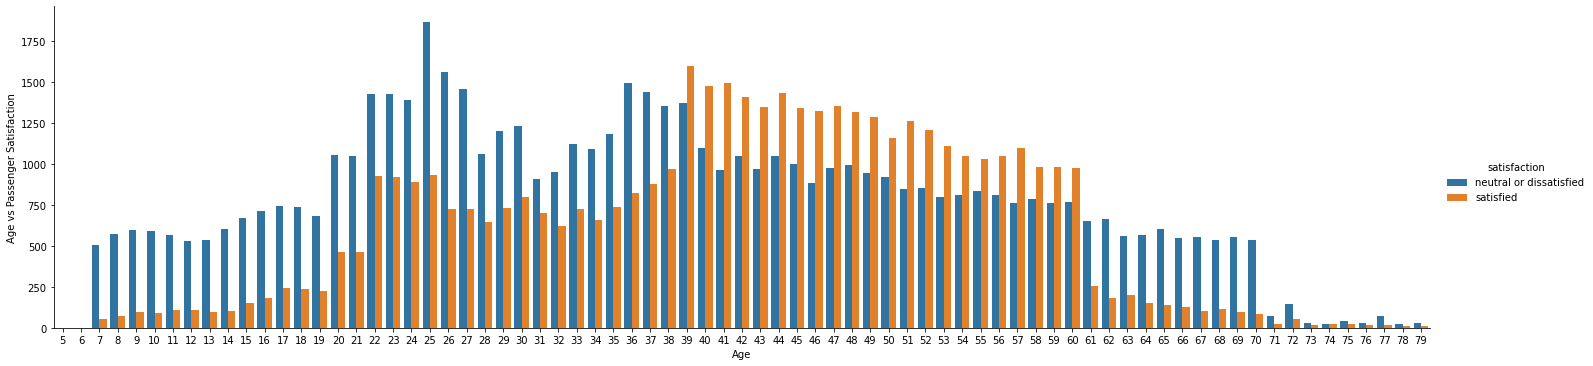

In [21]:
g = sns.catplot("Age", data=df_sat, aspect=4.0, kind='count', hue='satisfaction', order=range(5, 80))
g.set_ylabels('Age vs Passenger Satisfaction')

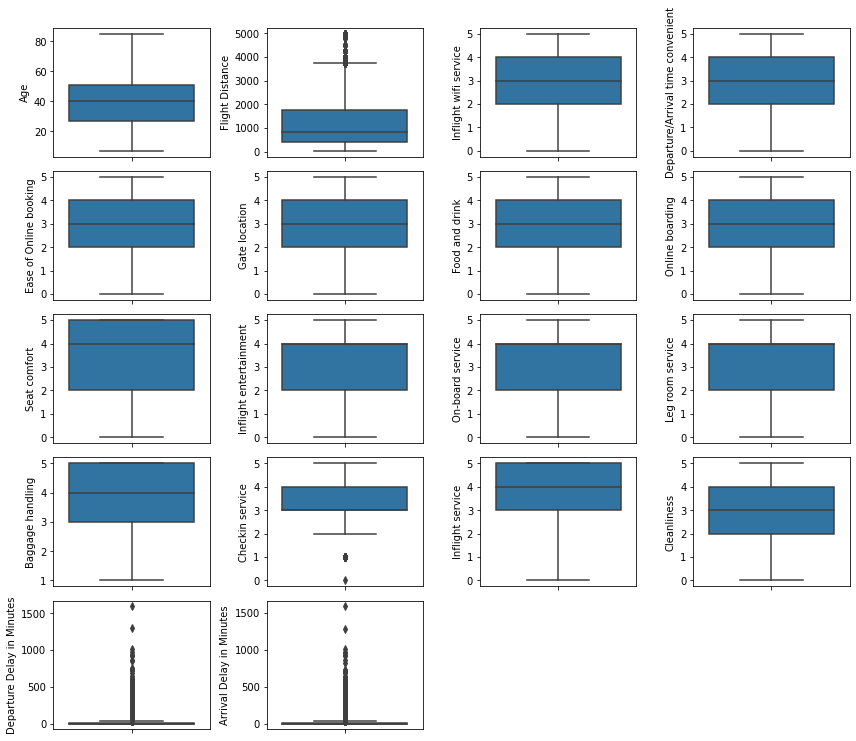

In [22]:
fig = plt.figure(figsize=(12,18))
df_num = df_sat.select_dtypes(include=np.number)
for i in range(len(df_num.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df_num.iloc[:,i])

plt.tight_layout()
plt.show()

- **Outlier are present in Departure Delay,Arrival Delay,Chechin Service and Flight Distance.**






# **Distribution of the numerical variable Phân phối của biến số**

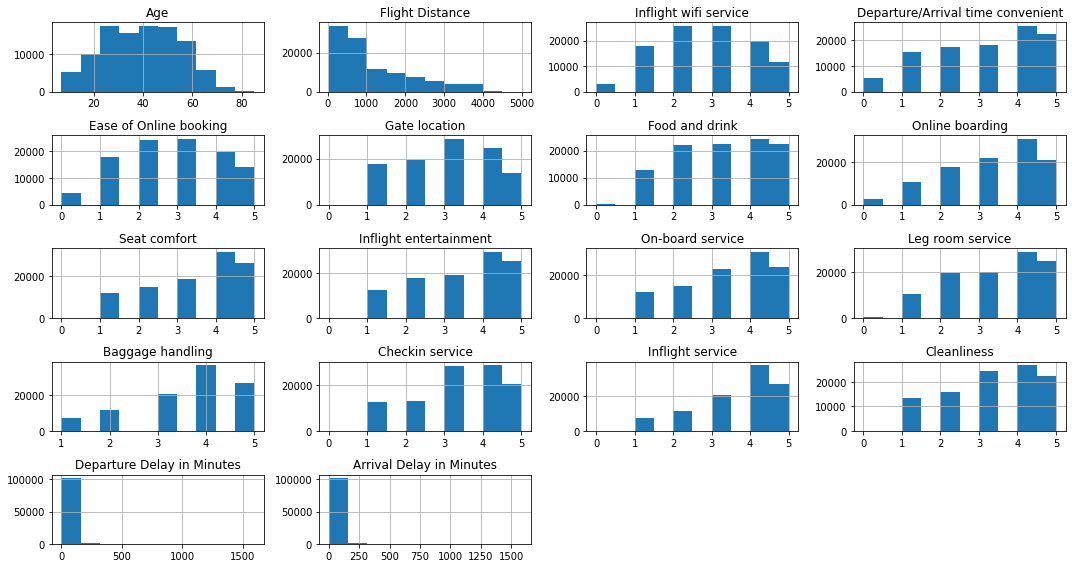

Skewness:


Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Arrival Delay in Minutes             6.605288
dtype: float64

In [23]:
df_sat.drop('satisfaction', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df_sat.drop('satisfaction', axis = 1).skew()

In [24]:
df_sat.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## **Encoding  Mã hóa biến **




In [25]:
# Encoding the Categorically variable
df_cat = df_sat.loc[:,['Gender' ,'Customer Type','Type of Travel' ,'Class','satisfaction']]

from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_cat.columns:
    lencoders[col] = LabelEncoder()
    df_cat[col] = lencoders[col].fit_transform(df_cat[col])
df_cat

Gender  Customer Type  Type of Travel  Class  satisfaction
0            1              0               1      2             0
1            1              1               0      0             0
2            0              0               0      0             1
3            0              0               0      0             0
4            1              0               0      0             1
...        ...            ...             ...    ...           ...
103899       0              1               0      1             0
103900       1              0               0      0             1
103901       1              1               0      0             0
103902       0              1               0      1             0
103903       1              0               0      0             0

[103904 rows x 5 columns]

In [26]:
df3 = df_sat.loc[:,['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
df3

Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  \
0                            3              1               5   
1                            3              3               1   
2                            2              2               5   
3                            5              5               2   
4                            3              3               4   
...                        ...            ...             ...   
103899                       2              3               2   
103900                       4              4               2   
103901                       1              3               4   
103902                       1              5               1   
103903                       3              3               1   

        Online boarding  Seat comfort  Inflight entertainment  \
0                     3             5                       5   
1                     3             1                       1   
2                     5             5                       5   
3                     2             2                       2   
4                     5             5                       3   
...                 ...           ...                     ...   
103899                2             2                       2   
103900                4             5                       5   
103901                1             5                       4   
103902                1             1                       1   
103903                1             1                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  
0                      5            5  
1                      4            1  
2                      4            5  
3                      4            2  
4                      3            3  
...                  ...          ...  
103899                 3            2  
103900                 5            4  
103901                 5            4  
103902                 4            1  
103903                 3            1  

[103904 rows x 14 columns]

In [27]:
df_cat1 = pd.concat([df_cat,df3],axis=1)
df_cat1

Gender  Customer Type  Type of Travel  Class  satisfaction  \
0            1              0               1      2             0   
1            1              1               0      0             0   
2            0              0               0      0             1   
3            0              0               0      0             0   
4            1              0               0      0             1   
...        ...            ...             ...    ...           ...   
103899       0              1               0      1             0   
103900       1              0               0      0             1   
103901       1              1               0      0             0   
103902       0              1               0      1             0   
103903       1              0               0      0             0   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  \
0                            3              1               5   
1                            3              3               1   
2                            2              2               5   
3                            5              5               2   
4                            3              3               4   
...                        ...            ...             ...   
103899                       2              3               2   
103900                       4              4               2   
103901                       1              3               4   
103902                       1              5               1   
103903                       3              3               1   

        Online boarding  Seat comfort  Inflight entertainment  \
0                     3             5                       5   
1                     3             1                       1   
2                     5             5                       5   
3                     2             2                       2   
4                     5             5                       3   
...                 ...           ...                     ...   
103899                2             2                       2   
103900                4             5                       5   
103901                1             5                       4   
103902                1             1                       1   
103903                1             1                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 

## **Scale the data**

In [28]:
from sklearn.preprocessing import StandardScaler 
Standard_scaler = StandardScaler()
df1 = df_sat.loc[:,['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
Standard_scaler.fit(df1)
df_final = pd.DataFrame(Standard_scaler.transform(df1), columns=df1.columns)

# First 5 observation
df_final.head()

Age  Flight Distance  Departure Delay in Minutes  \
0 -1.745279        -0.731539                    0.266393   
1 -0.951360        -0.957184                   -0.361375   
2 -0.885200        -0.047584                   -0.387532   
3 -0.951360        -0.629246                   -0.099805   
4  1.430397        -0.978244                   -0.387532   

   Arrival Delay in Minutes  
0                  0.074169  
1                 -0.236313  
2                 -0.391554  
3                 -0.158692  
4                 -0.391554

In [29]:
df_final_draft = pd.concat([df_cat1,df_final],axis=1)
df_final_draft

Gender  Customer Type  Type of Travel  Class  satisfaction  \
0            1              0               1      2             0   
1            1              1               0      0             0   
2            0              0               0      0             1   
3            0              0               0      0             0   
4            1              0               0      0             1   
...        ...            ...             ...    ...           ...   
103899       0              1               0      1             0   
103900       1              0               0      0             1   
103901       1              1               0      0             0   
103902       0              1               0      1             0   
103903       1              0               0      0             0   

        Inflight wifi service  Departure/Arrival time convenient  \
0                           3                                  4   
1                           3                                  2   
2                           2                                  2   
3                           2                                  5   
4                           3                                  3   
...                       ...                                ...   
103899                      2                                  1   
103900                      4                                  4   
103901                      1                                  1   
103902                      1                                  1   
103903                      1                                  3   

        Ease of Online booking  Gate location  Food and drink  ...  \
0                            3              1               5  ...   
1                            3              3               1  ...   
2                            2              2               5  ...   
3                            5              5               2  ...   
4                            3              3               4  ...   
...                        ...            ...             ...  ...   
103899                       2              3               2  ...   
103900                       4              4               2  ...   
103901                       1              3               4  ...   
103902                       1              5               1  ...   
103903                       3              3               1  ...   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness       Age  Flight Distance  \
0                      5            5 -1.745279        -0.731539   
1                      4            1 -0.951360        -0.957184   
2                      4            5 -0.885200        -0.047584   
3                      4            2 -0.951360        -0.629246   
4                      3            3  1.430397        -0.978244   
...                  ...          ...       ...              ...   
103899                 3            2 -1.083680        -1.00

## **Mutlicollinearity Đa Cộng tuyến **

<AxesSubplot:>

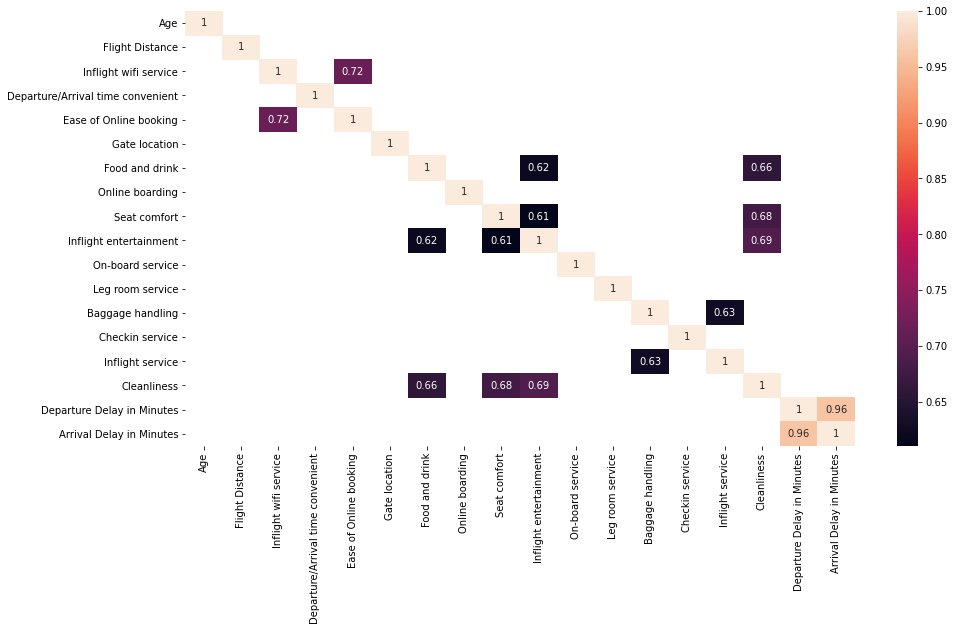

In [30]:
# mutlicollinearity
df = df_sat.drop('satisfaction',axis=1)
sns.heatmap(df.corr()[np.abs(df.corr()>0.6)],annot=True)

- **Their is Correlation between the variable.**

## **Train-Test Split**

In [31]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
y =df_final_draft['satisfaction']
df_num_scaled = df_final_draft.drop(['satisfaction'],axis=1)
X = sm.add_constant(df_num_scaled)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (72732, 23)
y_train (72732,)
X_test (31172, 23)
y_test (31172,)


## Naive-bayes-Model 1

In [32]:
# train_test_split
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X = df_final_draft.loc[:,['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Checkin service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

y =df_final_draft['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (72732, 12)
y_train (72732,)
X_test (31172, 12)
y_test (31172,)


In [33]:
# naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [34]:
y_pred = gnb_model.predict(X_test)

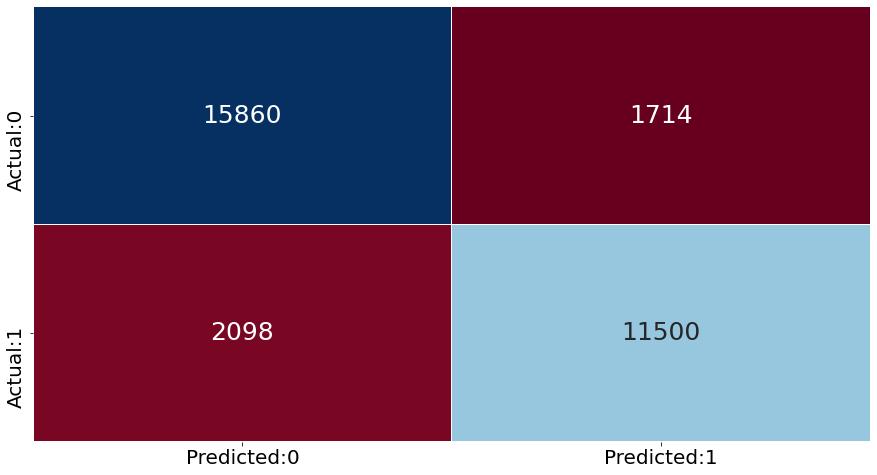

In [35]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [36]:
log_reg_feature = sm.Logit(y_train,X_train).fit()
# summary
print(log_reg_feature.summary())

Optimization terminated successfully.
         Current function value: 0.411736
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                72732
Model:                          Logit   Df Residuals:                    72720
Method:                           MLE   Df Model:                           11
Date:                Fri, 07 May 2021   Pseudo R-squ.:                  0.3980
Time:                        09:28:43   Log-Likelihood:                -29946.
converged:                       True   LL-Null:                       -49741.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Customer Type                 -1.9921      0.026    -75.319      0.000      

In [37]:
y_pred_prob = log_reg_feature.predict(X_test)
y_pred_prob.head()

2764      0.107671
94185     0.366532
84        0.881989
103238    0.068792
47413     0.712124
dtype: float64

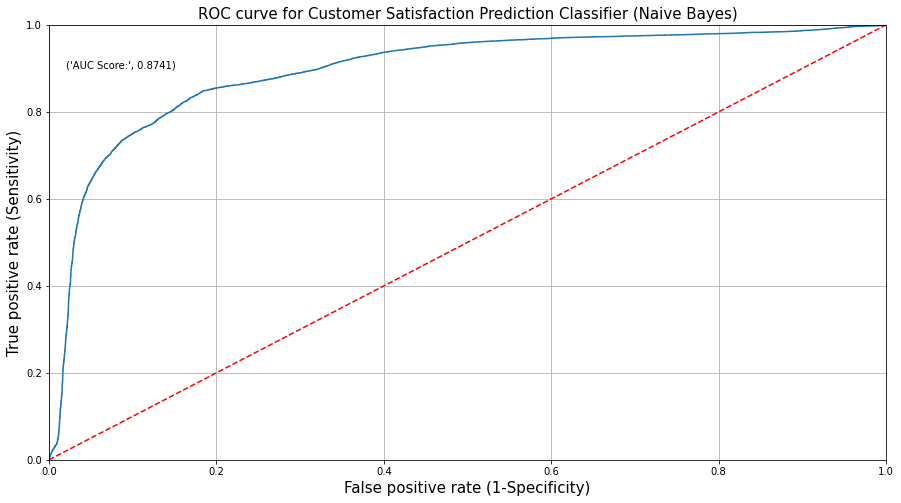

In [38]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Naive Bayes)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [39]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [40]:
score_card = pd.DataFrame(columns=['Model_Name','Threshold','AUC Score','Accuracy Score','Precision Score', 'Recall Score', 'Specificity','Kappa Score','FPR','f1-score'])

In [41]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'Navie-Bayes','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

Model_Name Threshold  AUC Score  Accuracy Score  Precision Score  \
0  Navie-Bayes         -   0.874091        0.877711         0.870289   

   Recall Score  Specificity  Kappa Score      FPR  f1-score  
0      0.845713      0.90247      0.75058  0.09753  0.857825

## **KNN(k=3)-Model 2**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors =3)
knn_model = knn_classification.fit(X_train, y_train)

In [43]:
y_pred = knn_model.predict(X_test)

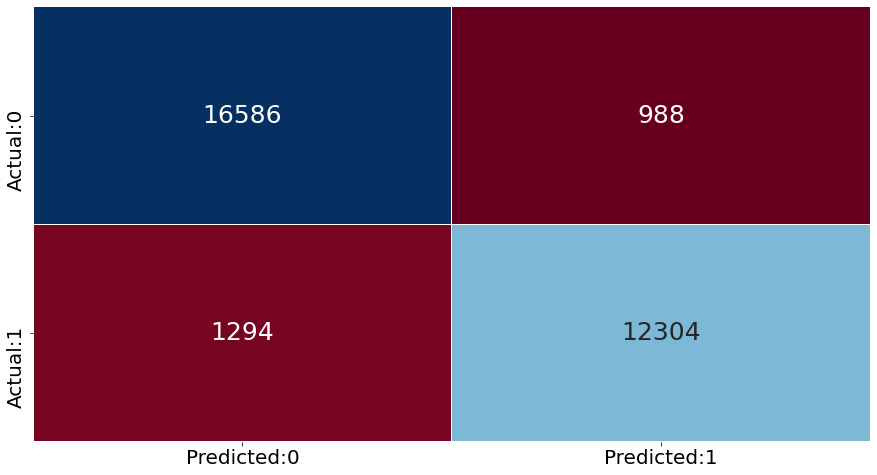

In [44]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

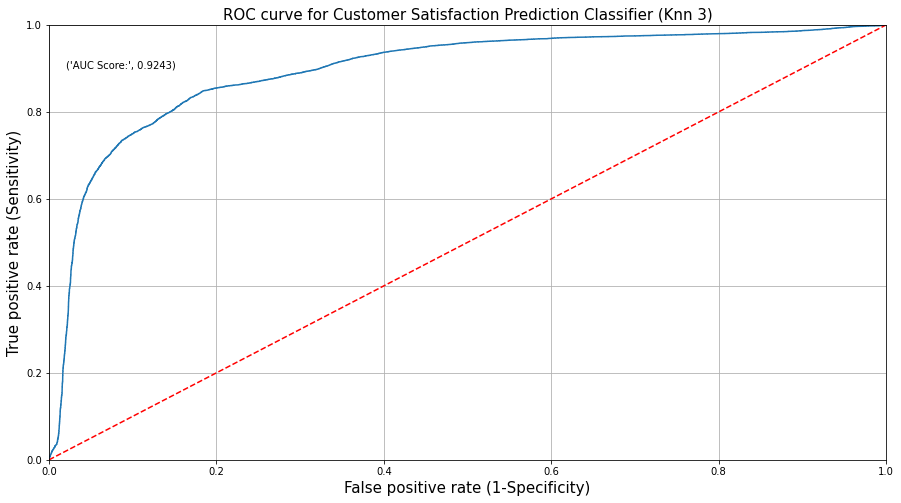

In [45]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (Knn 3)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [46]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [47]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=3)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card

Model_Name Threshold  AUC Score  Accuracy Score  Precision Score  \
0  Navie-Bayes         -   0.874091        0.877711         0.870289   
1     KNN(N=3)         -   0.924310        0.926793         0.925670   

   Recall Score  Specificity  Kappa Score       FPR  f1-score  
0      0.845713     0.902470     0.750580  0.097530  0.857825  
1      0.904839     0.943781     0.850785  0.056219  0.915136

## **GridSearchCV-Model 3**

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean','hamming','manhattan','Chebyshev']}
 
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

In [ ]:
knn_classification = KNeighborsClassifier(n_neighbors =17,metric='hamming')
knn_model = knn_classification.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Customer Satisfaction Prediction Classifier (knn Best params)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
Specificity = TN / (TN+FP)
f1_score = 2*((Precision*Recall)/(Precision+Recall))
Accuracy = (TN+TP) / (TN+FP+FN+TP)
FPR = 1-Specificity
score = pd.Series({'Model_Name':'KNN(N=17)','Threshold':'-','AUC Score':metrics.roc_auc_score(y_test, y_pred),'Accuracy Score':Accuracy,'Precision Score':Precision,'Recall Score':Recall,'Specificity':Specificity,'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),'FPR':FPR,'f1-score':f1_score})
score_card=score_card.append(score,ignore_index=True)
score_card